In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display basic information about datasets
print("Customers Dataset:")
print(customers.info())
print(customers.head())

print("\nProducts Dataset:")
print(products.info())
print(products.head())

print("\nTransactions Dataset:")
print(transactions.info())
print(transactions.head())

# Handle missing values (if any)
print("\nChecking for missing values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# EDA: Customers Dataset
print("\n--- Customers Dataset Analysis ---")
print("Number of unique customers:", customers['CustomerID'].nunique())
print("Customers per region:\n", customers['Region'].value_counts())
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
print("Customer signups by year:\n", customers['SignupYear'].value_counts())



Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID

C:\Users\shrasti\AppData\Local\Temp\ipykernel_25488\2631190148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='SignupYear', palette='viridis')


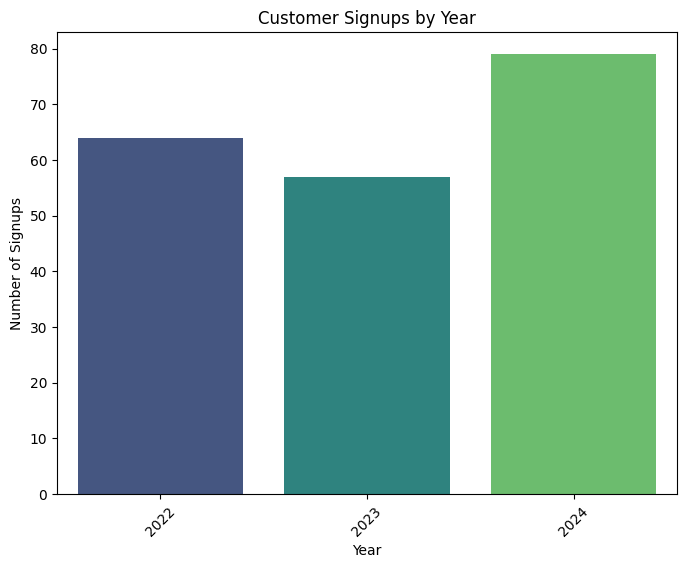


--- Products Dataset Analysis ---
Number of unique products: 100
Products by category:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
Average product price: 267.55170000000004


In [5]:

# Plot customer signups by year
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='SignupYear', palette='viridis')
plt.title("Customer Signups by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.show()

# EDA: Products Dataset
print("\n--- Products Dataset Analysis ---")
print("Number of unique products:", products['ProductID'].nunique())
print("Products by category:\n", products['Category'].value_counts())
print("Average product price:", products['Price'].mean())

C:\Users\shrasti\AppData\Local\Temp\ipykernel_25488\3895570459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y='Category', palette='cool')


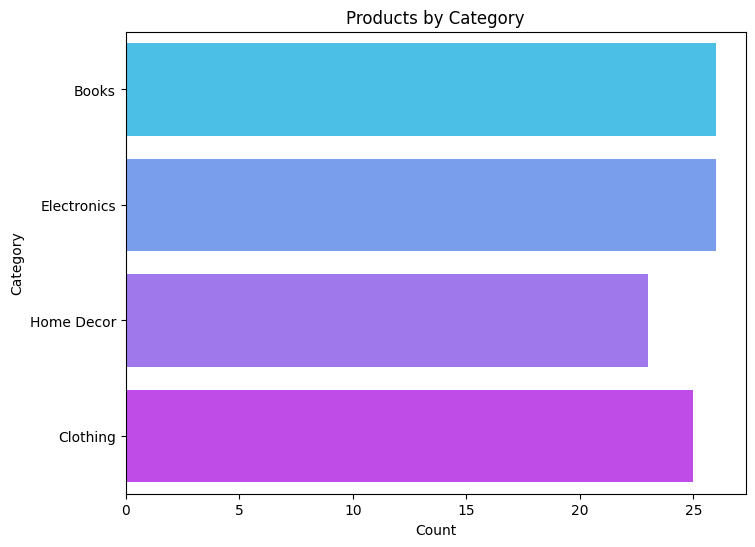


--- Transactions Dataset Analysis ---
Number of unique transactions: 1000
Number of unique customers in transactions: 199
Total revenue generated: 689995.56
Most frequently purchased products:
 ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
Name: count, dtype: int64


In [6]:
# Plot products by category
plt.figure(figsize=(8, 6))
sns.countplot(data=products, y='Category', palette='cool')
plt.title("Products by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# EDA: Transactions Dataset
print("\n--- Transactions Dataset Analysis ---")
print("Number of unique transactions:", transactions['TransactionID'].nunique())
print("Number of unique customers in transactions:", transactions['CustomerID'].nunique())
print("Total revenue generated:", transactions['TotalValue'].sum())
print("Most frequently purchased products:\n", transactions['ProductID'].value_counts().head())



Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


C:\Users\shrasti\AppData\Local\Temp\ipykernel_25488\3395543811.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_region.values, y=revenue_by_region.index, palette='magma')


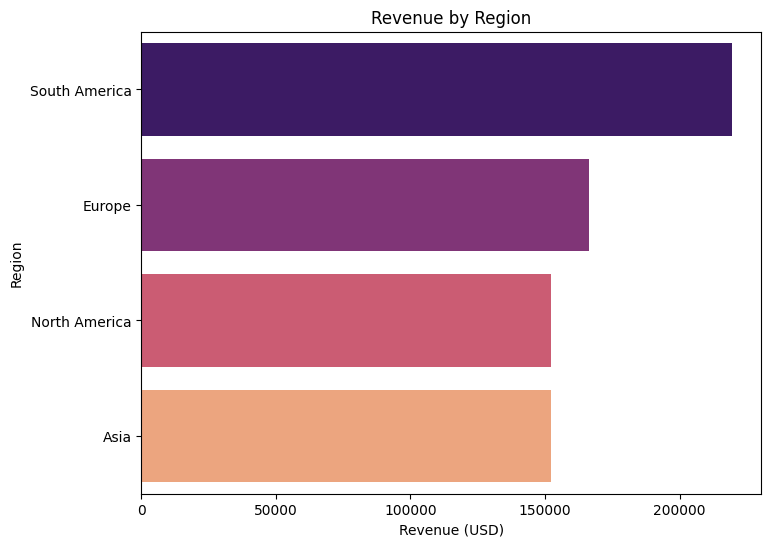


Top-performing products:
 ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


C:\Users\shrasti\AppData\Local\Temp\ipykernel_25488\3395543811.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='plasma')


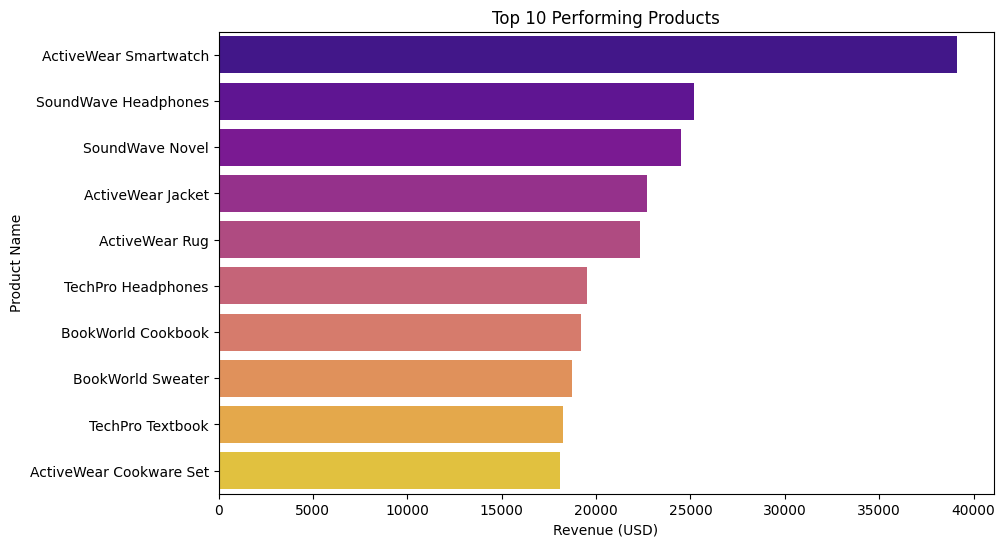

In [7]:

# Merge datasets for more insights
merged_data = transactions.merge(customers, on='CustomerID', how='inner').merge(products, on='ProductID', how='inner')

# Revenue by region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:\n", revenue_by_region)

# Plot revenue by region
plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_by_region.values, y=revenue_by_region.index, palette='magma')
plt.title("Revenue by Region")
plt.xlabel("Revenue (USD)")
plt.ylabel("Region")
plt.show()

# Top-performing products
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop-performing products:\n", top_products)

# Plot top-performing products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='plasma')
plt.title("Top 10 Performing Products")
plt.xlabel("Revenue (USD)")
plt.ylabel("Product Name")
plt.show()

# Business insights based on EDA
# 1. Signup trends show most customers join during certain years/regions.
# 2. Certain regions generate the most revenue, highlighting potential focus areas.
# 3. Top products can help determine inventory prioritization.
# 4. Product categories show which types of products perform well/poorly.
# 5. High CLV customers contribute significantly to revenue.

# Save the EDA results to a CSV (optional)
merged_data.to_csv('Merged_Data.csv', index=False)
